# 크롤링한 뉴닉 데이터 분석

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 모듈 임포트
import os
import pandas as pd
import matplotlib.pyplot as plt

# read csv to pandas dataframe
newneek = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_211002_onlylink.csv")
sample = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_sample.csv")

In [3]:
newneek.shape

(2821, 6)

In [4]:
display(newneek)

,기사id,카테고리,제목,날짜,요약문,원문
0,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,"미국은 가까이 중국은 멀리: 미국과 계속 친하게 지내고, 중국을 견제하는 데 신경 ...",https://www.yna.co.kr/view/AKR20210929177100083
1,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,당장 크게 달라지긴 어려울 것 같아요. 아베 전 총리보다는 갈등을 잘 안 만들려는 ...,https://www.yna.co.kr/view/AKR2021092911590050...
2,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,"\n그는 2015년 외무상을 할 때, 박근혜 정부와 맺은 ‘한일 위안부합의’를 이끌...",https://terms.naver.com/entry.naver?docId=5144...
3,1,코로나19,정부 백신 패스 도입 논의,2021/10/01,“백신 인증서 없으세요? 그럼 못 들어오세요.” 식당 들어갈 때 이런 말을 듣는다면...,https://go.seoul.co.kr/news/newsView.php?id=20...
4,1,코로나19,정부 백신 패스 도입 논의,2021/10/01,맞아요. 그래서 반대하는 목소리도 있어요 🤔.,https://www.hankookilbo.com/News/Read/A2021092...
...,...,...,...,...,...,...
2816,847,세계,재판스토리 in 하버드 ⚖️,2019/10/04,과연 아시아계 미국인들은 '공정하게' 뽑히고 있던 걸까요? 🙄 하버드 대학교의 아시...,https://www.reuters.com/article/us-harvard-adm...
2817,847,세계,재판스토리 in 하버드 ⚖️,2019/10/04,"이번 판은 하버드의 승! 5년 만의 판결에서, 하버드가 일부러 차별한 건 아니라는 ...",https://www.nytimes.com/2018/06/15/us/harvard-...
2818,847,세계,재판스토리 in 하버드 ⚖️,2019/10/04,"+ 🙅 “아시아인들을 이용하지 마!” 처음 SFFA가 소송을 시작했을 때, 하버드의...",https://news.joins.com/article/11775777
2819,848,세계,가짜뉴스 가만두면 가만 안 둔다!,2019/10/04,"며칠 전, 싱가포르 양치기가 블로그에 공유한 뉴스: 늑대가 나타났다! 다음 날 자고...",https://www.yna.co.kr/view/AKR20191002086700076


In [5]:
newneek[['기사id', '카테고리']].groupby(['카테고리']).count()

,기사id
카테고리,
경제,291
국내정치,495
노동·일,141
세계,783
여성,105
코로나19,262
테크,117
피자스테이션,37
환경,140


In [6]:
ref = [x.split("/")[2] for x in newneek['원문']]

In [7]:
newneek['ref'] = ref

In [35]:
newneek.head()

,기사id,카테고리,제목,날짜,요약문,원문,ref
0,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,"미국은 가까이 중국은 멀리: 미국과 계속 친하게 지내고, 중국을 견제하는 데 신경 ...",https://www.yna.co.kr/view/AKR20210929177100083,www.yna.co.kr
1,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,당장 크게 달라지긴 어려울 것 같아요. 아베 전 총리보다는 갈등을 잘 안 만들려는 ...,https://www.yna.co.kr/view/AKR2021092911590050...,www.yna.co.kr
2,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,"\n그는 2015년 외무상을 할 때, 박근혜 정부와 맺은 ‘한일 위안부합의’를 이끌...",https://terms.naver.com/entry.naver?docId=5144...,terms.naver.com
3,1,코로나19,정부 백신 패스 도입 논의,2021/10/01,“백신 인증서 없으세요? 그럼 못 들어오세요.” 식당 들어갈 때 이런 말을 듣는다면...,https://go.seoul.co.kr/news/newsView.php?id=20...,go.seoul.co.kr
4,1,코로나19,정부 백신 패스 도입 논의,2021/10/01,맞아요. 그래서 반대하는 목소리도 있어요 🤔.,https://www.hankookilbo.com/News/Read/A2021092...,www.hankookilbo.com


In [36]:
ref_df = newneek[['기사id', 'ref']].groupby(['ref']).count()

In [42]:
display(ref_df)

,기사id
ref,
biz.chosun.com,35
event.stibee.com,252
imnews.imbc.com,34
news.chosun.com,32
news.joins.com,213
news.jtbc.joins.com,28
news.kbs.co.kr,66
news.khan.co.kr,75
news.mt.co.kr,43


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1440x1440 with 0 Axes>

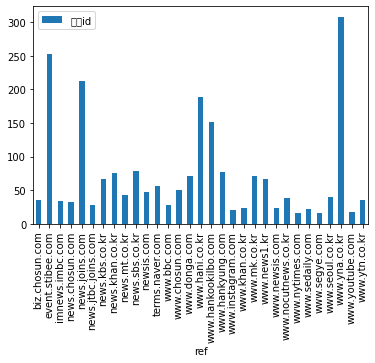

In [37]:
plt.figure(figsize=(20,20))
ref_df = ref_df[ref_df['기사id']>15]
ref_df.plot(kind='bar')

In [38]:
newneek['ref'].nunique()

307

In [39]:
len(ref_df)

31

In [40]:
ref_df.index

Index(['biz.chosun.com', 'event.stibee.com', 'imnews.imbc.com',
       'news.chosun.com', 'news.joins.com', 'news.jtbc.joins.com',
       'news.kbs.co.kr', 'news.khan.co.kr', 'news.mt.co.kr', 'news.sbs.co.kr',
       'newsis.com', 'terms.naver.com', 'www.bbc.com', 'www.chosun.com',
       'www.donga.com', 'www.hani.co.kr', 'www.hankookilbo.com',
       'www.hankyung.com', 'www.instagram.com', 'www.khan.co.kr',
       'www.mk.co.kr', 'www.news1.kr', 'www.newsis.com', 'www.nocutnews.co.kr',
       'www.nytimes.com', 'www.sedaily.com', 'www.segye.com',
       'www.seoul.co.kr', 'www.yna.co.kr', 'www.youtube.com', 'www.ytn.co.kr'],
      dtype='object', name='ref')

In [41]:
ref_df['기사id'].apply(int).sum()

2224

In [15]:
sample.head()

,id,category,title,date,summary,original_text,url
0,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,넷플릭스는 지금까지 한국 콘텐츠에 투자를 많이 해왔어요. 우리나라에 진출한 2016...,NaN,https://news.mt.co.kr/mtview.php?no=2021092913...
1,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,넷플릭스는 작년에 우리나라에서 4000억 원 넘는 매출을 냈어요 💰. 이중 영업이익...,NaN,https://www.sedaily.com/NewsView/22SMGZW6SM
2,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,"하지만 넷플릭스는 돈을 낼 수 없다며 버티고 있고, SKB 측은 다시 법적 대응을 ...",30일 SK브로드밴드 측 강신섭 법무법인 세종 대표변호사(가운데)를 비롯한 소송인단...,https://www.mk.co.kr/news/it/view/2021/09/931823/
3,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,제작비 줄게 저작권 다오: 보통 넷플릭스는 사전에 제작비를 대주는 대신 저작권을 다...,NaN,http://www.mediatoday.co.kr/news/articleView.h...
4,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,이건 아니지: “수익이 많이 나면 제작사에도 줘야지. 안 그러면 창작자 의욕 꺾여!”,NaN,https://www.news1.kr/articles/?4452813


In [16]:
print(sample.shape)

(44, 7)


In [17]:
sample.isnull().sum()

id                0
category          0
title             0
date              0
summary           0
original_text    24
url               0
dtype: int64

In [18]:
sample['length'] = [len(str(x)) for x in sample['original_text']]

In [19]:
display(sample)

,id,category,title,date,summary,original_text,url,length
0,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,넷플릭스는 지금까지 한국 콘텐츠에 투자를 많이 해왔어요. 우리나라에 진출한 2016...,NaN,https://news.mt.co.kr/mtview.php?no=2021092913...,3
1,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,넷플릭스는 작년에 우리나라에서 4000억 원 넘는 매출을 냈어요 💰. 이중 영업이익...,NaN,https://www.sedaily.com/NewsView/22SMGZW6SM,3
2,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,"하지만 넷플릭스는 돈을 낼 수 없다며 버티고 있고, SKB 측은 다시 법적 대응을 ...",30일 SK브로드밴드 측 강신섭 법무법인 세종 대표변호사(가운데)를 비롯한 소송인단...,https://www.mk.co.kr/news/it/view/2021/09/931823/,2094
3,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,제작비 줄게 저작권 다오: 보통 넷플릭스는 사전에 제작비를 대주는 대신 저작권을 다...,NaN,http://www.mediatoday.co.kr/news/articleView.h...,3
4,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,이건 아니지: “수익이 많이 나면 제작사에도 줘야지. 안 그러면 창작자 의욕 꺾여!”,NaN,https://www.news1.kr/articles/?4452813,3
5,1,경제,주식시장 파란불 뜬 이유 (1),2021/10/07,우리나라 주식시장에 파란불이 잔뜩 떴어요 📉. 주식시장이 왜 이러는지 여러 얘기가 ...,"<앵커>국내 주식시장에서 코스피가 반년 만에 3,000선 아래로 내려갔습니다. 코스...",https://news.sbs.co.kr/news/endPage.do?news_id...,855
6,1,경제,주식시장 파란불 뜬 이유 (1),2021/10/07,나라가 얼마까지 빚을 질 수 있는지 정해둔 걸(=부채한도) 늘리는 협상을 하는 거예...,NaN,https://news.einfomax.co.kr/news/articleView.h...,3
7,1,경제,주식시장 파란불 뜬 이유 (1),2021/10/07,돈은 부족한데 빚은 맘대로 못 내는 상황이잖아요. 협상을 못 마친 채로 정부 금고에...,미국 재무부. 연합뉴스 제공8월1일(현지시각) 기점으로 미국 정부 부채가 한도를 초...,https://www.hani.co.kr/arti/economy/economy_ge...,1472
8,2,테크,페이스북 전 직원의 폭로,2021/10/06,“피드를 새로고침 할 수 없습니다.” 어제(5일) 새벽 페이스북·인스타그램 등 페이...,[앵커]자회사 인스타그램이 청소년 정신 건강에 유해하다는 연구보고서를 갖고도 계속 ...,https://news.kbs.co.kr/news/view.do?ncd=5293308,1189
9,2,테크,페이스북 전 직원의 폭로,2021/10/06,하우겐은 언론을 통해 페이스북의 잘못을 폭로했어요. 페이스북이 이용자의 안전보다는 ...,NaN,https://www.wsj.com/articles/the-facebook-file...,3


In [20]:
nan = sample[sample['length'] == 3]
sample_full = sample.dropna()

In [21]:
display(nan)

,id,category,title,date,summary,original_text,url,length
0,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,넷플릭스는 지금까지 한국 콘텐츠에 투자를 많이 해왔어요. 우리나라에 진출한 2016...,NaN,https://news.mt.co.kr/mtview.php?no=2021092913...,3
1,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,넷플릭스는 작년에 우리나라에서 4000억 원 넘는 매출을 냈어요 💰. 이중 영업이익...,NaN,https://www.sedaily.com/NewsView/22SMGZW6SM,3
3,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,제작비 줄게 저작권 다오: 보통 넷플릭스는 사전에 제작비를 대주는 대신 저작권을 다...,NaN,http://www.mediatoday.co.kr/news/articleView.h...,3
4,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,이건 아니지: “수익이 많이 나면 제작사에도 줘야지. 안 그러면 창작자 의욕 꺾여!”,NaN,https://www.news1.kr/articles/?4452813,3
6,1,경제,주식시장 파란불 뜬 이유 (1),2021/10/07,나라가 얼마까지 빚을 질 수 있는지 정해둔 걸(=부채한도) 늘리는 협상을 하는 거예...,NaN,https://news.einfomax.co.kr/news/articleView.h...,3
9,2,테크,페이스북 전 직원의 폭로,2021/10/06,하우겐은 언론을 통해 페이스북의 잘못을 폭로했어요. 페이스북이 이용자의 안전보다는 ...,NaN,https://www.wsj.com/articles/the-facebook-file...,3
10,2,테크,페이스북 전 직원의 폭로,2021/10/06,안 좋은 거 알지만 🤐인스타그램은 미국에서 매일 약 2200만 명의 청소년이 이용할...,NaN,http://news.heraldcorp.com/view.php?ud=2021100...,3
12,3,경제,우유 생산비 연동제,2021/10/06,"딩동댕~! 10월 1일에 서울우유가 3년 만에 5.4% 올랐고, 다른 업체도 뒤이어...",NaN,https://www.edaily.co.kr/news/read?newsId=0120...,3
13,3,경제,우유 생산비 연동제,2021/10/06,"노노, 어렵지 않아요. 한마디로 원유 만드는 데 드는 비용이 오르거나 내리면(사료 ...",NaN,https://eiec.kdi.re.kr/material/clickView.do?c...,3
16,3,경제,우유 생산비 연동제,2021/10/06,"당장은 우유를 사용해 만드는 빵, 커피, 아이스크림 등 가격이 줄줄이 오를 거 같아...",NaN,https://www.news1.kr/articles/?4451241,3


In [22]:
display(sample_full)

,id,category,title,date,summary,original_text,url,length
2,0,국내정치,넷플릭스 인 더 국정감사,2021/10/07,"하지만 넷플릭스는 돈을 낼 수 없다며 버티고 있고, SKB 측은 다시 법적 대응을 ...",30일 SK브로드밴드 측 강신섭 법무법인 세종 대표변호사(가운데)를 비롯한 소송인단...,https://www.mk.co.kr/news/it/view/2021/09/931823/,2094
5,1,경제,주식시장 파란불 뜬 이유 (1),2021/10/07,우리나라 주식시장에 파란불이 잔뜩 떴어요 📉. 주식시장이 왜 이러는지 여러 얘기가 ...,"<앵커>국내 주식시장에서 코스피가 반년 만에 3,000선 아래로 내려갔습니다. 코스...",https://news.sbs.co.kr/news/endPage.do?news_id...,855
7,1,경제,주식시장 파란불 뜬 이유 (1),2021/10/07,돈은 부족한데 빚은 맘대로 못 내는 상황이잖아요. 협상을 못 마친 채로 정부 금고에...,미국 재무부. 연합뉴스 제공8월1일(현지시각) 기점으로 미국 정부 부채가 한도를 초...,https://www.hani.co.kr/arti/economy/economy_ge...,1472
8,2,테크,페이스북 전 직원의 폭로,2021/10/06,“피드를 새로고침 할 수 없습니다.” 어제(5일) 새벽 페이스북·인스타그램 등 페이...,[앵커]자회사 인스타그램이 청소년 정신 건강에 유해하다는 연구보고서를 갖고도 계속 ...,https://news.kbs.co.kr/news/view.do?ncd=5293308,1189
11,2,테크,페이스북 전 직원의 폭로,2021/10/06,페이스북에 진짜 위기가 왔다는 얘기가 나와요. 하우겐은 페이스북을 미국 증권거래위원...,[사진 제공: 연합뉴스]페이스북 전 직원이 CBS 간판 프로그램인 '60 미니츠'에...,https://imnews.imbc.com/news/2021/world/articl...,375
14,3,경제,우유 생산비 연동제,2021/10/06,"원유 가격이 이렇게 생산비로 결정되다 보니, 우유가 시장에 얼마나 많고 필요한지(=...",지난 18일 서울 시내의 한 대형마트에서 시민들이 우유를 고르고 있다. /뉴시스농림...,https://www.chosun.com/economy/economy_general...,1613
15,3,경제,우유 생산비 연동제,2021/10/06,가격 경쟁력 떨어져치즈·버터 같은 가공제품을 찾는 사람은 늘었는데 국산 원유가 비싸...,김지선 기자기자 페이지(서울=연합뉴스) 대표적인 기초식품으로 꼽히는 우윳값이 곧 오...,https://www.yna.co.kr/view/MYH20210903021400797,2379
20,4,피자스테이션,우주 개발에 대한 (거의) 모든 것,2021/10/06,"이 밖에 애플 공동 창업자인 ‘스티브 워즈니악’도 우주 기업을 세운다고 밝혀서, 관...",우주여행을 성공적으로 마친 세계 최고 부자 제프 베이조스 아마존 창업자가 추가로 거...,https://biz.chosun.com/international/internati...,2970
25,4,피자스테이션,우주 개발에 대한 (거의) 모든 것,2021/10/06,"우주 쓰레기 문제가 심각해지자, 이를 해결하기 위한 논의가 진행되고 있는데요. 20...",영화 승리호지난 3월 22일 카자흐스탄의 바이코누르 우주센터에서 우리나라가 개발한 ...,https://imnews.imbc.com/newszoomin/newsinsight...,3798
29,5,국내정치,국정감사 개념원리,2021/10/05,지난 1일부터 국회에서 국정감사가 시작됐어요. 왠지 복잡할 것 같아서 넘기려고 했다...,"올해 국정감사 첫날인 그제(1일), '대장동 손 피켓' 부착 등을 두고 치열한 신경...",https://news.sbs.co.kr/news/endPage.do?news_id...,1414


In [44]:
print("요약:", sample_full['summary'][2])
print("-"*100)
print("원문:", sample_full['original_text'][2])

요약: 하지만 넷플릭스는 돈을 낼 수 없다며 버티고 있고, SKB 측은 다시 법적 대응을 한 상태고요. 넷플릭스가 미국에서는 인터넷 회사에 사용료를 잘 내면서 유독 우리나라에서만큼은 못 내겠다고 하는 거라, 말이 나와요.
----------------------------------------------------------------------------------------------------
원문: 30일 SK브로드밴드 측 강신섭 법무법인 세종 대표변호사(가운데)를 비롯한 소송인단이 서울고등법원에서 반소장을 제출하고 있다. [사진 제공 = SK브로드밴드]국정감사를 앞두고 최대 1000억원에 달하는 망 사용대가를 내지 않겠다는 넷플릭스와 이를 납부해야 한다는 SK브로드밴드 간에 치열한 수싸움이 전개되고 있다. 특히 넷플릭스가 한국에 5조6000억원에 달하는 경제 효과를 가져오고 있다는 홍보전을 펼치자 여야 정치권에선 불쾌하다는 반응을 보이면서 국정감사를 벼르는 모습이다. 실제로 국회와 SK브로드밴드는 넷플릭스가 국내 서비스를 하면서 인터넷망 사용료를 내지 않고 있다며 1심 법원 판결대로 사용료를 납부하라는 입장이다. 반면 넷플릭스는 망 중립성 원칙에 따라 망 사용료를 낼 필요가 없다면서 "'오징어게임' 'D.P.' 등 사례를 볼 때 넷플릭스는 국내에서 수천억 원대 투자와 일자리 1만개를 창출하고 있다"며 자신들이 사업자로서 역할을 다하고 있음을 강조했다. 오는 5일 방송통신위원회 국정감사에서 넷플릭스 증인이 출석할 것으로 보여 망 사용료를 둘러싼 논쟁이 더욱 거세질 전망이다.30일 SK브로드밴드는 민법의 부당이득반환 법리에 의거해 넷플릭스에 망 이용대가 청구를 위한 반소를 제기한다고 밝혔다. 넷플릭스는 지난해 4월 SK브로드밴드를 상대로 '채무 부존재 확인 소송(망 중립성 원칙에 의거해 인터넷망 사용료를 낼 필요가 없다는 확인 소송)'을 제기했고, 서울중앙지방법원은 올해 6월 1심 판결을 통해 "망 사용료를 내야 한다"며 SK브로드밴드 손을 들어줬다. 하